In [371]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import missingno as ms
#import warnings
#warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

# reading
data = df = pd.read_csv('housing-classification-iter6.csv')

# X and y creation
X = data.drop(['PoolQC','Fence','Alley','MiscFeature'], axis=1)
y = X.pop("Expensive")


In [372]:
m_val=X.isnull().sum().sort_values(ascending=False)
m_val

FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageQual        81
GarageFinish      81
                ... 
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
HalfBath           0
SaleCondition      0
Length: 76, dtype: int64

Text(0.5, 1.0, 'Missing values Pattern')

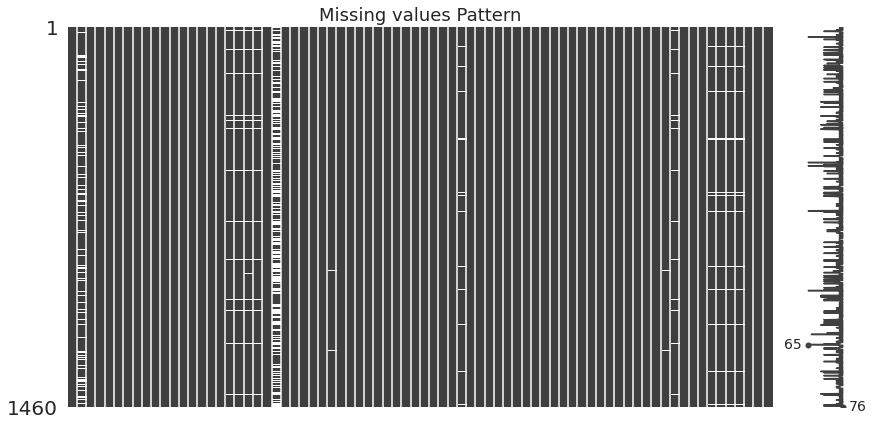

In [373]:
ms.matrix(X,figsize=(14,7))
plt.title("Missing values Pattern", size=18)

In [374]:
#selecting non-numerical columns
X_cat = X.select_dtypes(exclude="number")

# defining the imputer to use "N_A" as replacement value
cat_imputer = SimpleImputer(strategy="constant", 
                            fill_value="N_A")

# fitting the imputer
cat_imputer.fit(X_cat)

# transforming the data & keeping it as a DataFrame
X_cat_imputed = pd.DataFrame(cat_imputer.transform(X_cat), 
                             columns=X_cat.columns)
X_cat_imputed.head()

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,...,HeatingQC,Electrical,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,...,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Feedr,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,...,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,...,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Norm,GasA,Pave,Y,BrkTil,TA,TA,TA,Gd,...,Gd,SBrkr,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,...,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [375]:
#Selecting numerical columns
X_num = X.select_dtypes(include="number")

# Imputing the mean
num_imputer = SimpleImputer(strategy="mean")

# Fitting
num_imputer.fit(X_num)

# Transforming, keeping a DataFrame
X_num_imputed = pd.DataFrame(num_imputer.transform(X_num), 
                             columns=X_num.columns)

X_num_imputed.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSSubClass,...,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id
0,8450.0,65.0,856.0,3.0,0.0,0.0,2.0,0.0,0.0,60.0,...,8.0,2003.0,548.0,61.0,0.0,0.0,0.0,2.0,2008.0,1.0
1,9600.0,80.0,1262.0,3.0,1.0,0.0,2.0,298.0,0.0,20.0,...,6.0,1976.0,460.0,0.0,0.0,0.0,0.0,5.0,2007.0,2.0
2,11250.0,68.0,920.0,3.0,1.0,0.0,2.0,0.0,0.0,60.0,...,6.0,2001.0,608.0,42.0,0.0,0.0,0.0,9.0,2008.0,3.0
3,9550.0,60.0,756.0,3.0,1.0,0.0,3.0,0.0,0.0,70.0,...,7.0,1998.0,642.0,35.0,272.0,0.0,0.0,2.0,2006.0,4.0
4,14260.0,84.0,1145.0,4.0,1.0,0.0,3.0,192.0,0.0,60.0,...,9.0,2000.0,836.0,84.0,0.0,0.0,0.0,12.0,2008.0,5.0


In [376]:
X_imputed = pd.concat([X_cat_imputed, X_num_imputed], axis=1)
X_imputed.head()

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,...,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id
0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,...,8.0,2003.0,548.0,61.0,0.0,0.0,0.0,2.0,2008.0,1.0
1,RL,Feedr,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,...,6.0,1976.0,460.0,0.0,0.0,0.0,0.0,5.0,2007.0,2.0
2,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,...,6.0,2001.0,608.0,42.0,0.0,0.0,0.0,9.0,2008.0,3.0
3,RL,Norm,GasA,Pave,Y,BrkTil,TA,TA,TA,Gd,...,7.0,1998.0,642.0,35.0,272.0,0.0,0.0,2.0,2006.0,4.0
4,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,...,9.0,2000.0,836.0,84.0,0.0,0.0,0.0,12.0,2008.0,5.0


In [377]:
from sklearn.preprocessing import OneHotEncoder

# initialize
my_onehot = OneHotEncoder(drop='first')

# fit
my_onehot.fit(X_cat_imputed)

# transform
X_cat_imputed_onehot = my_onehot.transform(X_cat_imputed)

In [378]:
X_cat_imputed_onehot

<1460x212 sparse matrix of type '<class 'numpy.float64'>'
	with 49270 stored elements in Compressed Sparse Row format>

In [379]:
df = pd.DataFrame.sparse.from_spmatrix(X_cat_imputed_onehot)
df

,0,1,2,3,4,5,6,7,8,9,...,202,203,204,205,206,207,208,209,210,211
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1457,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [380]:
colnames = my_onehot.get_feature_names_out(X_cat_imputed.columns)
df.columns = colnames
df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [381]:
X_imputed = pd.concat([df, X_num_imputed], axis=1)
X_imputed

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,...,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,8.0,2003.0,548.0,61.0,0.0,0.0,0.0,2.0,2008.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6.0,1976.0,460.0,0.0,0.0,0.0,0.0,5.0,2007.0,2.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,6.0,2001.0,608.0,42.0,0.0,0.0,0.0,9.0,2008.0,3.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,7.0,1998.0,642.0,35.0,272.0,0.0,0.0,2.0,2006.0,4.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,9.0,2000.0,836.0,84.0,0.0,0.0,0.0,12.0,2008.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,7.0,1999.0,460.0,40.0,0.0,0.0,0.0,8.0,2007.0,1456.0
1456,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,7.0,1978.0,500.0,0.0,0.0,0.0,0.0,2.0,2010.0,1457.0
1457,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,9.0,1941.0,252.0,60.0,0.0,0.0,2500.0,5.0,2010.0,1458.0
1458,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5.0,1950.0,240.0,0.0,112.0,0.0,0.0,4.0,2010.0,1459.0


In [386]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=31416)

In [387]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [388]:
from sklearn.metrics.cluster import entropy
#Logistic Regression Model
l_regression=LogisticRegression()
l_regression.fit(X_train,y_train)
l_regression_score=round(l_regression.score(X_train,y_train)*100, 2)
print("Accuracy for Logistic Regression Model is ",l_regression_score)

#Dicision Tree Model
d_tree=DecisionTreeClassifier()
d_tree.fit(X_train,y_train)
d_tree_score=round(d_tree.score(X_train,y_train)*100, 2)
print("Accuracy for Decision Tree Model is ",d_tree_score)

#RandomForest Model
r_forest=RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=3245)
r_forest.fit(X_train,y_train)
r_forest_score=round(r_forest.score(X_train,y_train)*100, 2)
print("Accuracy for Random Forest Model is ",r_forest_score)


#SVC
svc=SVC(kernel='rbf',random_state=31416)
svc.fit(X_train,y_train)
svc_score=round(svc.score(X_train,y_train)*100, 2)
print("Accuracy for Support Vector Machine Model is ",svc_score)

#Gaussian NB
g_nb=GaussianNB()
g_nb.fit(X_train,y_train)
g_nb_score=round(g_nb.score(X_train,y_train)*100, 2)
print("Accuracy for Gaussian NB Model is ",g_nb_score)

# KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
knn.fit(X_train,y_train)
knn_score=round(knn.score(X_train,y_train)*100, 2)
print("Accuracy for KNN Model is ",knn_score)

Accuracy for Logistic Regression Model is  92.98
Accuracy for Decision Tree Model is  100.0
Accuracy for Random Forest Model is  100.0
Accuracy for Support Vector Machine Model is  85.96
Accuracy for Gaussian NB Model is  81.51
Accuracy for KNN Model is  94.43


In [389]:
selection =pd.DataFrame({"Models":['Logistic Reg','Dicision Tree','Random Forest','SVC','Gaussian NB','KNN'],
                        'Accuracy_values':[l_regression_score,d_tree_score,r_forest_score,svc_score,g_nb_score,knn_score] 
} ).sort_values(by='Accuracy_values', ascending=False)
selection

,Models,Accuracy_values
1,Dicision Tree,100.00
2,Random Forest,100.00
5,KNN,94.43
0,Logistic Reg,92.98
3,SVC,85.96
4,Gaussian NB,81.51


Text(0.5, 1.0, 'Comparison between different models')

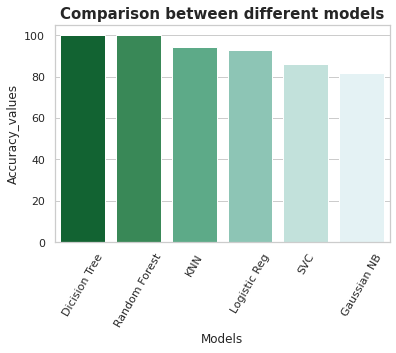

In [390]:
sns.set_theme(style='whitegrid')
sns.barplot(data=selection,x='Models', y='Accuracy_values', palette="BuGn_r")
plt.xticks(rotation=60)
plt.title("Comparison between different models", weight='bold', size=15)

## Random Forest Model accuracy

In [391]:
r_forest_predict=r_forest.predict(X_train)

In [392]:
# Check accuracy on the train set
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train,
               y_pred = r_forest_predict
              )

1.0

In [397]:
final_prediction=r_forest.predict(X_test)

In [398]:
# Check accuracy on the train set
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_test,
               y_pred = final_prediction
              )

0.9452054794520548

In [399]:
output_df=pd.DataFrame({'Id':X_test['Id'],'Expensive':final_prediction})
output_df.head()

,Id,Expensive
1253,1254.0,0
202,203.0,0
213,214.0,0
1331,1332.0,0
120,121.0,0


In [400]:
#from google.colab import files
#output_df.to_csv("RF_Expensive.csv", index=False)
#files.download("RF_Expensive.csv")

## Decision Tree Model Accuracy

In [401]:
y_pred_dtree_train=d_tree.predict(X_train)

In [402]:
# Check accuracy on the train set
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train,
               y_pred = y_pred_dtree_train
              )

1.0

In [403]:
prediction=d_tree.predict(X_test)

In [404]:
# Check accuracy on the train set
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_test,
               y_pred = prediction
              )

0.928082191780822

In [405]:
output=pd.DataFrame({'Id':X_test['Id'],'Expensive':prediction})
output.head()

,Id,Expensive
1253,1254.0,1
202,203.0,0
213,214.0,0
1331,1332.0,0
120,121.0,0


In [406]:
#from google.colab import files
#output.to_csv("DT_Expensive.csv", index=False)
#files.download("DT_Expensive.csv")


## KNN Model Accuracy

In [407]:
y_pred_knn_train=knn.predict(X_train)

In [408]:
# Check accuracy on the train set
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train,
               y_pred = y_pred_knn_train
              )

0.9443493150684932

In [409]:
knn_prediction=knn.predict(X_test)

In [410]:
# Check accuracy on the train set
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_test,
               y_pred = knn_prediction
              )

0.934931506849315